## Problem 1.

Using the data set called `problem1.csv (x_training, y_training)`:

a) Find the polynomial that fits the best training data

b) Using the AIC criteria, find the best polynomial that can fit the data.

c) Cross validate the polynomial with the data set called `problem1.csv (x_test, y_test)`

### Todo List:

- [x] Finish coding part

- [ ] Add comments

In [2]:
from scipy import stats
import numpy as np
import pandas as pd 
import math
import matplotlib.pyplot as plt
from random import seed

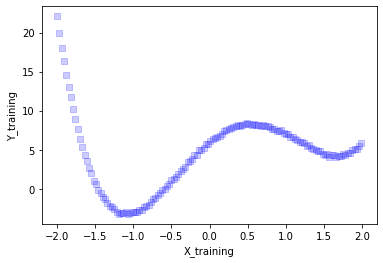

In [7]:
data = pd.read_csv('data/problem1.csv')
X_training = data['X_training']
Y_training = data['Y_training']

ax = plt.plot(X_training, Y_training, 'bs', alpha=0.2,)
plt.xlabel('X_training')
plt.ylabel('Y_training')
plt.show()


### (a) Polynomial Fitting

#### Module Import

In [8]:
import numpy.polynomial.polynomial as poly

In [10]:
coef = poly.polyfit(X_training, Y_training, 8, rcond=None, w=None) # Assuming a Polynomyal degree 8

In [11]:
model = poly.Polynomial(coef)
model

Polynomial([ 6.00793895e+00,  8.03796810e+00, -6.06320867e+00, -3.02503500e+00,
        2.09500406e+00,  8.00105182e-03, -4.29431659e-02, -1.12113794e-03,
        5.73512923e-03], domain=[-1,  1], window=[-1,  1])

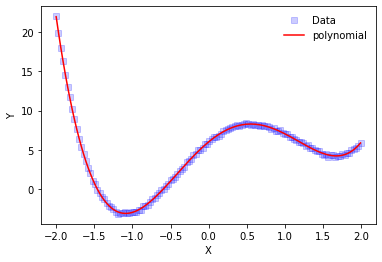

In [15]:
plt.plot(X_training, Y_training, 'bs', alpha=0.2, label='Data')
plt.plot(X_training, model(X_training), 'r', label='polynomial')
plt.legend(loc='best', frameon=False)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()